# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [2]:
! git clone https://github.com/annekuma/labs

Cloning into 'labs'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 120 (delta 50), reused 53 (delta 27), pack-reused 32 (from 1)
Receiving objects: 100% (120/120), 22.55 MiB | 24.05 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [61]:
# 1
df = pd.read_csv('/content/labs/04_hedonic_pricing/airbnb_hw.csv')

print(df.info())
df.dropna(inplace=True)
df.rename(columns={'Neighbourhood ': 'Neighborhood'}, inplace=True)
df.rename(columns={'Number Of Reviews': 'Number of Reviews'}, inplace=True)
df['Host Since'] = pd.to_datetime(df['Host Since'])
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
print(df.info())

for column in df.columns.tolist():
    print(f"{column}: {df[column].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

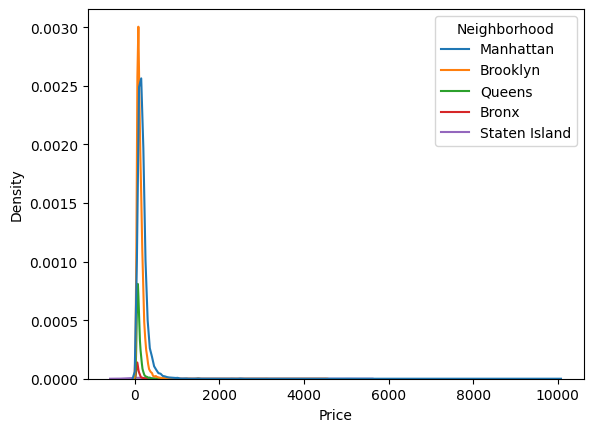

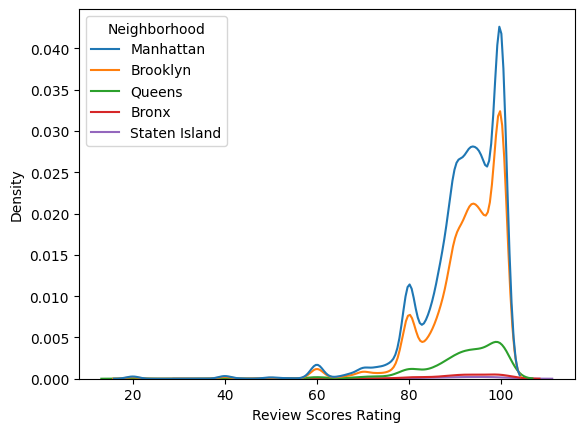

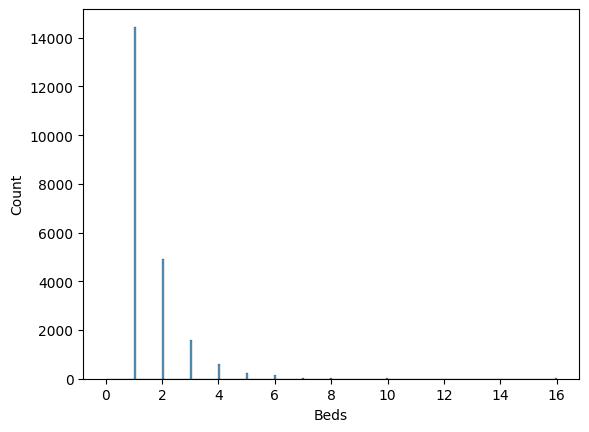

In [62]:
# 1
sns.kdeplot(x=df['Price'], hue=df['Neighborhood'])
plt.show()
sns.kdeplot(x=df['Review Scores Rating'], hue=df['Neighborhood'])
plt.show()
sns.histplot(df['Beds'])
plt.show()

In [70]:
# 2
numerical = ['Host Id', 'Host Since', 'Name', 'Review Scores Rating (bin)', 'Beds', 'Number of Records', 'Review Scores Rating', 'Number of Reviews', 'Price']
df_dummies = df.drop(['Neighborhood', 'Property Type', 'Room Type', 'Zipcode', 'Host Since'], axis = 1)

dummies = pd.get_dummies(df['Neighborhood'])
df_dummies = pd.concat([df_dummies, dummies], axis=1)

dummies = pd.get_dummies(df['Property Type'])
df_dummies = pd.concat([df_dummies, dummies], axis=1)

dummies = pd.get_dummies(df['Room Type'])
df_dummies = pd.concat([df_dummies, dummies], axis=1)

dummies = pd.get_dummies(df['Zipcode'])
df_dummies = pd.concat([df_dummies, dummies], axis=1)

print(df_dummies)

        Host Id                                 Name  \
4           500             Trendy Times Square Loft   
5          1039   Big Greenpoint 1BD w/ Skyline View   
6          1783                         Amazing Also   
7          2078  Colorful, quiet, & near the subway!   
8          2339  East Village Cocoon: 2 Bedroom Flat   
...         ...                                  ...   
30332  42349033     Cute cozy studio in east village   
30347  42430249           Room in new spacious loft!   
30378  42518458   Williamsburg Luxury Loft!??Bed Top   
30404  42697124  Cute, Clean Room- East Williamsburg   
30409  42726605    Cozy and Near Tourist Attractions   

       Review Scores Rating (bin)  Beds  Number of Records  Number of Reviews  \
4                            95.0   3.0                  1                 39   
5                           100.0   1.0                  1                  4   
6                           100.0   1.0                  1                  9   
7  

In [71]:
y = df_dummies['Price']
X = df_dummies.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [75]:
# 4
Z_train = X_train[['Beds']]
Z_test = X_test[['Beds']]

reg = linear_model.LinearRegression(fit_intercept=True).fit(Z_train,y_train)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
y_hat = reg.predict(Z_test)

print("Beds:")
print('R^2: ' + str(reg.score(Z_test,y_test)))
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('RMSE: ' + str(rmse))
print(results, "\n")

Z_train = X_train[['Number of Reviews']]
Z_test = X_test[['Number of Reviews']]

reg = linear_model.LinearRegression(fit_intercept=True).fit(Z_train,y_train)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
y_hat = reg.predict(Z_test)

print("Number of Reviews:")
print('R^2: ' + str(reg.score(Z_test,y_test)))
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('RMSE: ' + str(rmse))
print(results, "\n")

Z_train = X_train[['Review Scores Rating']]
Z_test = X_test[['Review Scores Rating']]

reg = linear_model.LinearRegression(fit_intercept=True).fit(Z_train,y_train)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
y_hat = reg.predict(Z_test)

print("Review Scores Rating:")
print('R^2: ' + str(reg.score(Z_test,y_test)))
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('RMSE: ' + str(rmse))
print(results, "\n")

Z_train = X_train[['Review Scores Rating (bin)']]
Z_test = X_test[['Review Scores Rating (bin)']]

reg = linear_model.LinearRegression(fit_intercept=True).fit(Z_train,y_train)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
y_hat = reg.predict(Z_test)

print("Review Scores Rating (bin):")
print('R^2: ' + str(reg.score(Z_test,y_test)))
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('RMSE: ' + str(rmse))
print(results, "\n")

Beds:
R^2: 0.08434205880294265
RMSE: 197.41496200696386
  variable  coefficient
0     Beds    50.782819 

Number of Reviews:
R^2: -0.00019044548626645508
RMSE: 206.32639126341832
            variable  coefficient
0  Number of Reviews    -0.185565 

Review Scores Rating:
R^2: -0.0012115719837968442
RMSE: 206.4316870097362
               variable  coefficient
0  Review Scores Rating     1.195862 

Review Scores Rating (bin):
R^2: -0.0010042256038933495
RMSE: 206.41031036942564
                     variable  coefficient
0  Review Scores Rating (bin)     1.139186 



In [88]:
# 5
Z_train = X_train[['Review Scores Rating', 'Beds']]
Z_test = X_test[['Review Scores Rating', 'Beds']]

reg = linear_model.LinearRegression(fit_intercept=True).fit(Z_train,y_train)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
y_hat = reg.predict(Z_test)

print("Review Scores Rating & Beds")
print('R^2: ' + str(reg.score(Z_test,y_test)))
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('RMSE: ' + str(rmse))
print(results)

Z_train = X_train[['Review Scores Rating', 'Number of Reviews']]
Z_test = X_test[['Review Scores Rating', 'Number of Reviews']]

reg = linear_model.LinearRegression(fit_intercept=True).fit(Z_train,y_train)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
y_hat = reg.predict(Z_test)

print("Review Scores Rating & Number of Reviews")
print('R^2: ' + str(reg.score(Z_test,y_test)))
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('RMSE: ' + str(rmse))
print(results)

Z_train = X_train[['Review Scores Rating', 'Number of Reviews', 'Beds']]
Z_test = X_test[['Review Scores Rating', 'Number of Reviews', 'Beds']]

reg = linear_model.LinearRegression(fit_intercept=True).fit(Z_train,y_train)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
y_hat = reg.predict(Z_test)

print("Review Scores Rating, Number of Reviews & Beds")
print('R^2: ' + str(reg.score(Z_test,y_test)))
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('RMSE: ' + str(rmse))
print(results)

Z_train = X_train[['Review Scores Rating', 'Number of Reviews', 'Beds', 'Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']]
Z_test = X_test[['Review Scores Rating', 'Number of Reviews', 'Beds', 'Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']]

reg = linear_model.LinearRegression(fit_intercept=True).fit(Z_train,y_train)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
y_hat = reg.predict(Z_test)

print("Review Scores Rating, Number of Reviews Beds & Neighborhoods")
print('R^2: ' + str(reg.score(Z_test,y_test)))
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('RMSE: ' + str(rmse))
print(results)

Review Scores Rating & Beds
R^2: 0.08552735605744866
RMSE: 197.2871461620129
               variable  coefficient
0  Review Scores Rating     1.594245
1                  Beds    51.631955
Review Scores Rating & Number of Reviews
R^2: -0.001160192658762993
RMSE: 206.42639019879434
               variable  coefficient
0  Review Scores Rating     1.187068
1     Number of Reviews    -0.177746
Review Scores Rating, Number of Reviews & Beds
R^2: 0.08610702715084673
RMSE: 197.22460750364715
               variable  coefficient
0  Review Scores Rating     1.583272
1     Number of Reviews    -0.250106
2                  Beds    51.813766
Review Scores Rating, Number of Reviews Beds & Neighborhoods
R^2: 0.1124386539486627
RMSE: 194.36256487971502
               variable  coefficient
0  Review Scores Rating     1.664292
1     Number of Reviews    -0.278304
2                  Beds    53.082848
3             Manhattan    75.730661
4              Brooklyn    14.982186
5                Queens   -11.3

# 6
None of the models I created were accurate, however, the ones with beds were slightly more accurate than the rest when there was no tranformation. The R^2 value when beds were included was around 0.08 compared to -0.00 when it wasn't. \
When transformations were used, the more variables included, the better. When I included Review Scores Rating, Number of Reviews Beds & Neighborhoods, the R^2 value increased slightly to 0.11. Though I still would not consider this a good model, it shows that there were improvements.